# Random Forests Classifiers & Regressor models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
X= data.iloc[:,:-1]
y = data.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [6]:
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [7]:
from sklearn import metrics 

metrics.accuracy_score(y_test,y_pred)

1.0

## model predict

In [8]:
#taking an example of sepal_length, sepal_width, petal_length, petal_width:

clf.predict([[1,2,2,3]])

C:\Users\ziton\PycharmProjects\PythonProject\PythonProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

## feature_importance_

In [9]:
feature_list = list(X.columns)
feature_list

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [10]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

petal_width     0.464293
petal_length    0.384626
sepal_length    0.109434
sepal_width     0.041647
dtype: float64

In [11]:
feature_imp.index

Index(['petal_width', 'petal_length', 'sepal_length', 'sepal_width'], dtype='object')

Text(0, 0.5, 'features')

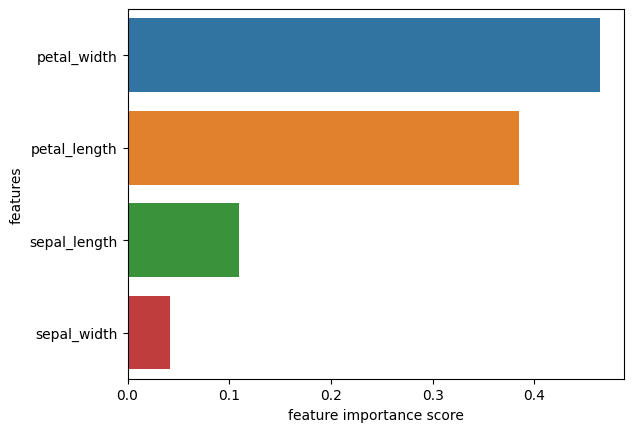

In [12]:
#sns bar plot to visualize the weighted analysis 

sns.barplot(x=feature_imp,y=feature_imp.index,hue=feature_imp.index)
plt.xlabel("feature importance score")
plt.ylabel("features")
# plt.legend(feature_imp.index)

## based on the feature_importance_, considering reducing the numbers of features

In [13]:
X = data[['petal_width', 'petal_length', 'sepal_length']]   # remove feature "sepal_width" due to its smallest feature_importance_

y = data["species"]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [14]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

## Random Forest for Regression

In [15]:
dataset = pd.read_csv("Lesson20-petrol_consumption.csv")
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [16]:
X = dataset.drop("Petrol_Consumption",axis=1)
y = dataset["Petrol_Consumption"]
X

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.00,3571,1976,0.525
1,9.00,4092,1250,0.572
2,9.00,3865,1586,0.580
3,7.50,4870,2351,0.529
4,8.00,4399,431,0.544
5,10.00,5342,1333,0.571
6,8.00,5319,11868,0.451
7,8.00,5126,2138,0.553
8,8.00,4447,8577,0.529
9,7.00,4512,8507,0.552


In [17]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

## feature scaling Scikit-Learn's standardscaler

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) # Do NOT use fit_transform on the test set

In [19]:
x_train

array([[-2.73259538, -0.33955082,  3.3984119 , -0.14899157],
       [ 1.31648337,  0.03335615, -0.2080471 , -1.05857286],
       [-0.70805601, -0.59865988,  0.25983422,  0.22226611],
       [-0.70805601,  0.83519365,  0.13040266,  2.78394404],
       [ 0.30421368,  0.28021005, -1.37981582, -0.557375  ],
       [ 1.31648337, -0.90678958, -0.19152393, -0.557375  ],
       [-0.70805601, -0.05768217,  0.84447934, -0.03761426],
       [-0.70805601,  0.13840036,  1.34898704,  0.22226611],
       [-0.70805601, -1.04859927,  0.4030351 , -1.04000998],
       [-0.20192116,  1.55299578,  2.40812276, -0.91006979],
       [ 0.30421368,  1.55299578, -0.9097314 , -0.39030905],
       [-0.70805601,  0.18567026, -0.42312381,  1.81867409],
       [-0.20192116, -0.68794746,  0.99676797,  0.09232592],
       [ 0.30421368, -1.2446818 , -0.53603219, -1.61545937],
       [-1.72032569,  1.70881137, -0.86456805,  1.81867409],
       [ 2.32875305,  1.93115496, -1.13141737, -0.05617715],
       [-0.70805601, -1.

In [20]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor (n_estimators = 100,random_state=4)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

## evaluating the algorithm

In [21]:
from sklearn import metrics

print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Mean Root Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  59.265999999999984
Mean Squared Error:  5277.408359999999
Mean Root Squared Error:  72.64577317366785


## n_estimators

In [22]:
rmse = nestimators = []

for n in [5,10,15,20,30,50,80,100,200,300,400,500]:
    regressor = RandomForestRegressor(n_estimators = n,random_state=0)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    print("n_estimators = {}".format(n))
    print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
    print("Mean Root Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

    rmse = np.append(rmse,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    nestimators = np.append(nestimators,n)

n_estimators = 5
Mean Absolute Error:  58.40000000000001
Mean Squared Error:  5617.584000000001
Mean Root Squared Error:  74.9505436938252
n_estimators = 10
Mean Absolute Error:  47.290000000000006
Mean Squared Error:  4239.867
Mean Root Squared Error:  65.11426111075822
n_estimators = 15
Mean Absolute Error:  51.873333333333335
Mean Squared Error:  4580.013777777776
Mean Root Squared Error:  67.67579905533275
n_estimators = 20
Mean Absolute Error:  48.28999999999999
Mean Squared Error:  4517.159999999999
Mean Root Squared Error:  67.20982071096455
n_estimators = 30
Mean Absolute Error:  51.77333333333331
Mean Squared Error:  4745.421333333333
Mean Root Squared Error:  68.8870186126046
n_estimators = 50
Mean Absolute Error:  55.94199999999999
Mean Squared Error:  5117.48828
Mean Root Squared Error:  71.53662194987963
n_estimators = 80
Mean Absolute Error:  54.838750000000005
Mean Squared Error:  5136.049515625001
Mean Root Squared Error:  71.66623692942863
n_estimators = 100
Mean Absol

In [23]:
rmse

array([74.95054369, 65.11426111, 67.67579906, 67.20982071, 68.88701861,
       71.53662195, 71.66623693, 72.58186309, 72.5968166 , 72.94063373,
       72.31602728, 71.68697778])

Text(0, 0.5, 'RMSE')

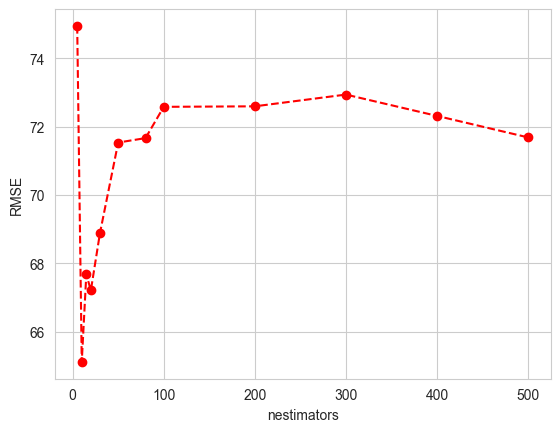

In [24]:
sns.set_style("whitegrid")
plt.plot(nestimators,rmse,"ro",linestyle="--")
plt.xlabel("nestimators")
plt.ylabel("RMSE")

In [25]:
#smaller RMSE, better model parameters